#Importing Libraries

In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
import matplotlib.pyplot as plt

#Importing Dataset

In [ ]:
# Load the IMDB movie review dataset
num_words = 10000
max_sequence_length = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

# Padding the input and target sequences

In [ ]:
# Pad sequences to a fixed length
X_train = pad_sequences(X_train, maxlen=max_sequence_length)
X_test = pad_sequences(X_test, maxlen=max_sequence_length)

# Defining the seq2seq model architecture

In [ ]:
latent_dim = 256

# Encoder

In [ ]:
encoder_inputs = Input(shape=(max_sequence_length,))
encoder_embedding = Embedding(num_words, latent_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

# Decoder

In [ ]:
decoder_inputs = Input(shape=(max_sequence_length,))
decoder_embedding = Embedding(num_words, latent_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(num_words, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Create and Compiling the model

In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model

In [ ]:
history = model.fit([X_train, X_train], np.expand_dims(X_train, -1),validation_data=([X_test, X_test], np.expand_dims(X_test, -1)),
                    batch_size=64, epochs=10)

Epoch 1/10
391/391 [==============================] - 157s 392ms/step - loss: 4.6226 - accuracy: 0.3353 - val_loss: 2.4617 - val_accuracy: 0.6877
Epoch 2/10
391/391 [==============================] - 115s 293ms/step - loss: 1.6535 - accuracy: 0.8008 - val_loss: 1.0480 - val_accuracy: 0.8812
Epoch 3/10
391/391 [==============================] - 92s 236ms/step - loss: 0.7585 - accuracy: 0.9191 - val_loss: 0.4898 - val_accuracy: 0.9505
Epoch 4/10
391/391 [==============================] - 91s 232ms/step - loss: 0.3724 - accuracy: 0.9621 - val_loss: 0.2490 - val_accuracy: 0.9755
Epoch 5/10
391/391 [==============================] - 88s 225ms/step - loss: 0.1901 - accuracy: 0.9817 - val_loss: 0.1238 - val_accuracy: 0.9889
Epoch 6/10
391/391 [==============================] - 100s 255ms/step - loss: 0.0906 - accuracy: 0.9925 - val_loss: 0.0557 - val_accuracy: 0.9966
Epoch 7/10
391/391 [==============================] - 97s 248ms/step - loss: 0.0384 - accuracy: 0.9982 - val_loss: 0.0223 - val

# Visualize the accuracy and loss

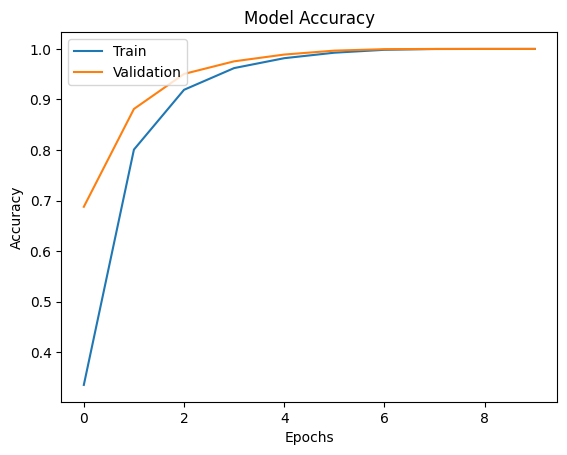

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

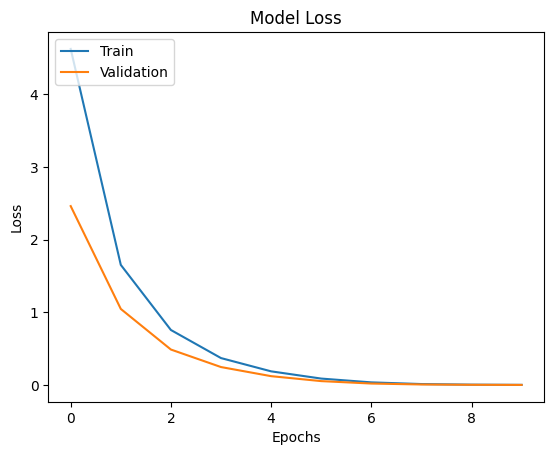

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()